Mõned märkused koodi kirjutamise protsessi juurde:
•	Kuna kokku on tekste üle 150000, siis alustati testimist väiksema andmehulga peal (5000 teksti).
•	Valikust jäid välja tekstid, kus on vähem kui 2 sõna.
•	Kuna eesmärgiks oli eeskätt üles kasvatusväärtustega tekstid, siis selles etapis kasutati jaotust, kus kasvatusväärtused olid jaotatud kaheks – traditsioonilised ja autonoomsed.
•	Online tekstides on väga levinud lausete kokkukirjutamine  ilma tühikuta. Kui laused olid jäetud tühikuteta eraldamata ja lõppesid punkti, hüüumärgi või küsimärgiga, siis tekitasime sinna lausete vahele tühiku.
•	Lemmatiseeriti laused. Kui lemmatiseeritud sõna jäi analüüsi järel mitmeseks (näiteks 'kuulama|kuulanud“), siis võrreldi kõiki EstNLTK poolt pakutud sõnu kasvatusväärtuste sõnastikus leiduvatega. 
•	Grammatikaga loodi sõnapaarid „sõna kuulama“, „kuulama sõna“, „käsku täitma“, „kohustusi täitma“.
•	Kasvatusväärtusi sisaldavad laused paigutati sõnastikesse, kus võtmeteks olid kasvatusväärtused ja väärtusteks laused.

In [3]:
import re
import json
from collections import Counter
from collections import defaultdict
from estnltk import Text, Regex, Lemmas, Postags, Concatenation, Union, Gaps
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
nimisonad = Lemmas('käitumine', 'laps','õpilane', 'koolilaps','poiss','tüdruk','komme','kasvatus','kasvatamine')
omadussonad =Lemmas('viisakas','korralik','aus' )
space = Regex('\s')
verb2 =Lemmas('kuulama')
verb4 =Lemmas('täitma')
nimisona2=Lemmas('sõna')
nimisona5=Lemmas('kohustus')
nimisona6=Lemmas('käsk')
omadussonad_nimisonad=Concatenation(omadussonad,nimisonad, sep = space)
kuulama_sona = Concatenation(verb2, nimisona2, sep = space)
sona_kuulama =Concatenation(nimisona2, verb2, sep = space)
kohustus_taitma =Concatenation(nimisona5,verb4, sep = space)
kask_taitma =Concatenation(nimisona6,verb4, sep = space)
trad_vaartused = Gaps(Union(kuulama_sona, sona_kuulama,kohustus_taitma,omadussonad_nimisonad))


In [5]:
trad = ['kuulekas','sõnakuulelik','töökas','ausus','püüdlik','sõnakuulekas',
        'hoolas','distsiplineeritud','kuulekus','sõnakuulelikkus','austus',
        'viisakus','töökus','püüdlikkus','korralikkus','usinus',
        'distsipliin','enesedistsipliin', 'austama','vastutustunne',
        'kohusetunne','kohusetundlik','austav','sõnakuulekus', 'lugupidav',
        'respekteeriv','hästikasvatatud','sõnapidaja','sõnapidamine',
        'kohusetruu','edasipüüdlikkus','korraarmastus','korraarmastaja',
        'distsiplineeritus','õppimistahe','andestav','abivalmis',
        'abivalmidus','isetu', 'isetus'
        ]

In [6]:
auton =['enesekindlus','eneseusaldus','loovus','uudishimulikkus','iseseisvus',
        'ettevõtlikkus','eneseteadvus','eesmärgikindlus','visadus','järjekindlus',
        'sihikindlus','sitkus','loomingulisus','enesekindel','loov','uudishimulik',
        'iseseisev','ettevõtlik','eneseteadlik','sihiteadlik','järjekindel',
        'sihikindel','teotahteline','tegus','algatusvõimeline','järjekindel',
        'loominguline','ambitsioonikas', 'sihiteadlik','saavutusvajadus',
        'algatusvõime','otsustamisjulgus','kreatiivne','kreatiivsus',
        'teadmisjanuline','edasipüüdlik','eneseaustus', 'eneseteostus'
         ]

In [7]:
jarjend =[]#loeme andmed faili
arv =0
with open('koik_test.json') as f:
    for line in f:
        uus_rida = json.loads(line)  
        jarjend.append(uus_rida)

In [8]:
aasta_loe = Counter()#loeme postitused aastate kaupa
for rida in jarjend:
    kuupaev = rida[3]
    aasta = re.findall(r'\d{4}',str(kuupaev))#võtan kuupäevast välja aasta
    aasta = int(aasta[0])
    if aasta != 2019:#arvesse ei lähe 2019 aasta postitused
        aasta_loe[aasta]+=1

In [9]:
result_aasta = sorted(aasta_loe.items(),key=lambda t : t[0]) #järjestame 
df =pd.DataFrame(result_aasta) #postitused aastate järgi
df.columns=['Aasta','Postitused'] #teeme tabelisse veergude pealkirjad
df.set_index('Aasta',inplace=True) #muudame aasta indeksiks
df 

,Postitused
Aasta,
2012,29734
2013,26350
2014,27902
2015,22274
2016,18665
2017,15550
2018,18320


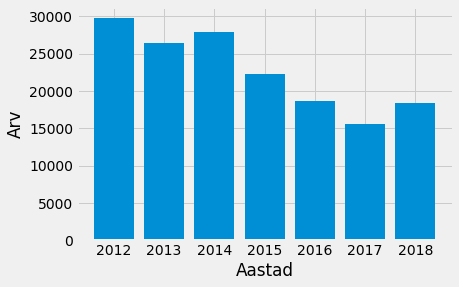

In [11]:
#teen tulemustest joonise
with plt.style.context('fivethirtyeight'):
    plt.bar(*zip(*result_aasta))
    plt.xlabel('Aastad')
    plt.ylabel('Arv')
    plt.show()

In [63]:
uus_list2 =[]
puhas_rida =[]
trad_tekst = defaultdict(list)
auton_tekst = defaultdict(list)
trad_loe = Counter()
auton_loe = Counter()
arv =0
for j_rida in jarjend:
    kuupaev = j_rida[3]
    tekst = j_rida[4]
    aasta = re.findall(r'\d{4}',str(kuupaev))#võtan kuupäevast välja aasta
    aasta = int(aasta[0])
    if len(tekst.split())>1 and aasta != 2019:#välja jäävad teksid, mis on lühemad kui 2 sõna
        aasta_loe[aasta]+=1
        uus_tekst2 = re.sub(r'\.([a-zA-Z])', r'. \1', tekst)#lahutan kokkukirjutatud lauseid
        uus_tekst3= re.sub(r'\?([a-zA-Z])', r'? \1', uus_tekst2)
        uus_tekst4= re.sub(r'\!([a-zA-Z])', r'! \1', uus_tekst3)
        tekst = Text(uus_tekst4)#teen teksti objektiks
        for lause in tekst.split_by('sentences'):#teen tekstid lauseteks
            puhas_lause = lause['text']#lause tekst
            lemmad =Text(lause).lemmas#lemmatiseeritud lause
            for match in trad_vaartused.get_matches(lause):#otsin kasvatusväärtusi grammatikaga
                lemmatiseerimine =' '.join(map(str, Text(match.text).lemmas))
                trad_tekst[lemmatiseerimine].append(puhas_lause)
                trad_loe[lemmatiseerimine]+=1
                uus_list2 +=[[j_rida[0],j_rida[1],j_rida[2],j_rida[3],uus_tekst4]]             
            for j in range(len(lemmad)):#käin laused üle sõnakaupa
                sona =lemmad[j]
                if '|'in sona:#kui lemma jääb mitmeseks, siis lisame nimekirja esimesel kohal oleva sõnakuju
                    nimekiri = list((sona).split('|'))                
                    for rida in nimekiri:
                        if rida in trad:
                            trad_tekst[sona].append(puhas_lause)
                            trad_loe[sona]+=1
                            uus_list2 +=[[j_rida[0],j_rida[1],j_rida[2],j_rida[3],uus_tekst4]]                                
                        if rida in looming:
                            auton_tekst[sona].append(puhas_lause)
                            auton_loe[sona]+=1
                            uus_list2 +=[[j_rida[0],j_rida[1],j_rida[2],j_rida[3],uus_tekst4]]                                
                else:
                    if sona in trad:
                        trad_tekst[sona].append(puhas_lause)
                        trad_loe[sona]+=1
                        uus_list2 +=[[j_rida[0],j_rida[1],j_rida[2],j_rida[3],uus_tekst4]]                            
                    if sona in looming:
                        auton_tekst[sona].append(puhas_lause)
                        auton_loe[sona]+=1
                        uus_list2 +=[[j_rida[0],j_rida[1],j_rida[2],j_rida[3],uus_tekst4]]

         

In [64]:
print('Traditsioonilised',trad_loe)
print('Autonoomsed',auton_loe)

Traditsioonilised Counter({'austama': 328, 'kohusetunne': 256, 'distsipliin': 238, 'viisakus': 213, 'kohusetundlik': 181, 'austus': 164, 'püüdlik': 142, 'vastutustunne': 128, 'abivalmis': 106, 'töökas': 87, 'sõna kuulama': 66, 'hoolas': 66, 'sõnakuulelik': 60, 'lugupidav': 60, 'töökus': 51, 'ausus': 47, 'kuulama sõna': 45, 'kuulekas': 42, 'püüdlikkus': 40, 'kohustus täitma': 36, 'korralikkus': 35, 'enesedistsipliin': 35, 'korralik laps': 32, 'viisakas käitumine': 28, 'viisakas laps': 24, 'austav': 22, 'korraarmastaja': 16, 'hästikasvatatud': 16, 'korralik tüdruk': 15, 'korraarmastus': 13, 'distsiplineerima|distsiplineeritud': 12, 'austama|austatud': 11, 'abivalmidus': 11, 'usinus': 11, 'korralik käitumine': 11, 'korralik poiss': 9, 'austama|austanud': 8, 'korralik kasvatus': 7, 'kohustus täitma|täitnud': 7, 'kuulekus': 7, 'austama laps': 6, 'kohustus täidetud|täitma': 6, 'viisakas poiss': 6, 'viisakas komme': 5, 'korralik lapsevanem': 5, 'õppimistahe': 5, 'sõnakuulelikkus': 4, 'korrali

Alljärgnevad kaks koodilõiku on deaktiveeritud, aga kui nad aktiveerida, saab näha kasvatusväätustega seoses tekstidest leitud lauseid.

In [ ]:
#for k,v in trad_tekst.items(): #traditsioonilised kasvatusväärtused koos lausetega
    #print(k)
    #print()
    #for number,rida in enumerate(v[:5],start =1): #kuvatakse 5 lauset, soovi
        #print(number,rida) #korral saab muuta suuremaks arvu
    #print()
    #print('-------------------------')
    #print()

In [ ]:
#for k,v in auton_tekst.items():#autonoomsed kasvatusväärtused koos lausetega
    #print(k)
    #print()
    #for number,rida in enumerate(v[:5],start =1):#vastavalt soovile saab 
        #print(number,rida) #muuta kuvatavate lausete arvu, praegu on see 5
    #print()
    #print('-------------------------')
    #print() 

In [67]:
import json #salvestame andmed ka enne unikaalsete andmeridade leidmist
with open('puhastatud2.json', 'w') as fout:
    for rida in uus_list2:
        json.dump(rida,fout)
        fout.write('\n')

In [68]:
#leiame unikaalsed andmeread
unikaalsed_tekstid = [list(x) for x in set(tuple(x) for x in uus_list2)]

In [69]:
print(len(unikaalsed_tekstid))#unikaalsete andmeridade arv
arv =0
loplik_list =[]
loplik_rida =[]
for rida in unikaalsed_tekstid:#lisame igale reale järjekorranumbri ehk indeksi
    arv +=1
    loplik_rida = [arv,rida[0],rida[1],rida[2],rida[3],rida[4]]
    loplik_list += [loplik_rida]


4612


In [70]:
with open('loplikult_puhastatud3.json', 'w') as fout:#kirjutame 
    for rida in loplik_list: #puhastatud andmed faili
        json.dump(rida,fout)
        fout.write('\n')